<a href="https://colab.research.google.com/github/ahan-2000/OCELET-2023/blob/main/EDA_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
#JSON Path
path_name='/content/drive/MyDrive/ocelot2023_v0.1.2/metadata.json'

Converting into Pandas DF

In [4]:
with open(path_name) as f:
    data = json.load(f)


In [6]:
sample_pairs = data['sample_pairs']
df = pd.DataFrame.from_dict(sample_pairs, orient='index')


In [11]:
df.head()

,slide_name,cell,tissue,patch_x_offset,patch_y_offset,mpp_x,mpp_y,organ,subset
001,TCGA-4A-A93X-01Z-00-DX2.45011BF1-FED8-4D22-B5E...,"{'x_start': 67768, 'y_start': 29944, 'x_end': ...","{'x_start': 66192, 'y_start': 28368, 'x_end': ...",0.625,0.625,0.25270,0.25270,kidney,train
002,TCGA-4A-A93X-01Z-00-DX2.45011BF1-FED8-4D22-B5E...,"{'x_start': 40976, 'y_start': 6304, 'x_end': 4...","{'x_start': 40976, 'y_start': 6304, 'x_end': 4...",0.125,0.125,0.25270,0.25270,kidney,train
003,TCGA-5P-A9KF-01Z-00-DX1.E35ED527-BD60-4534-B23...,"{'x_start': 40960, 'y_start': 40960, 'x_end': ...","{'x_start': 40960, 'y_start': 40960, 'x_end': ...",0.125,0.125,0.19448,0.19448,kidney,train
004,TCGA-A3-3328-01Z-00-DX1.8FA7DFCD-D6FD-4950-9E4...,"{'x_start': 59847, 'y_start': 45290, 'x_end': ...","{'x_start': 58230, 'y_start': 45290, 'x_end': ...",0.625,0.125,0.24620,0.24620,kidney,train
005,TCGA-A3-3328-01Z-00-DX1.8FA7DFCD-D6FD-4950-9E4...,"{'x_start': 66317, 'y_start': 30732, 'x_end': ...","{'x_start': 64700, 'y_start': 29115, 'x_end': ...",0.625,0.625,0.24620,0.24620,kidney,train


In [14]:
#Adding new columns to analyze start and end.
# Create 'cell_start' and 'cell_end' columns
df['cell_start'] = df['cell'].apply(lambda x: (x['x_start'], x['y_start']))
df['cell_end'] = df['cell'].apply(lambda x: (x['x_end'], x['y_end']))

# Create 'tissue_start' and 'tissue_end' columns
df['tissue_start'] = df['tissue'].apply(lambda x: (x['x_start'], x['y_start']))
df['tissue_end'] = df['tissue'].apply(lambda x: (x['x_end'], x['y_end']))


In [15]:
df.head()

,slide_name,cell,tissue,patch_x_offset,patch_y_offset,mpp_x,mpp_y,organ,subset,cell_start,cell_end,tissue_start,tissue_end
001,TCGA-4A-A93X-01Z-00-DX2.45011BF1-FED8-4D22-B5E...,"{'x_start': 67768, 'y_start': 29944, 'x_end': ...","{'x_start': 66192, 'y_start': 28368, 'x_end': ...",0.625,0.625,0.25270,0.25270,kidney,train,"(67768, 29944)","(68556, 30732)","(66192, 28368)","(69344, 31520)"
002,TCGA-4A-A93X-01Z-00-DX2.45011BF1-FED8-4D22-B5E...,"{'x_start': 40976, 'y_start': 6304, 'x_end': 4...","{'x_start': 40976, 'y_start': 6304, 'x_end': 4...",0.125,0.125,0.25270,0.25270,kidney,train,"(40976, 6304)","(41764, 7092)","(40976, 6304)","(44128, 9456)"
003,TCGA-5P-A9KF-01Z-00-DX1.E35ED527-BD60-4534-B23...,"{'x_start': 40960, 'y_start': 40960, 'x_end': ...","{'x_start': 40960, 'y_start': 40960, 'x_end': ...",0.125,0.125,0.19448,0.19448,kidney,train,"(40960, 40960)","(41983, 41983)","(40960, 40960)","(45055, 45055)"
004,TCGA-A3-3328-01Z-00-DX1.8FA7DFCD-D6FD-4950-9E4...,"{'x_start': 59847, 'y_start': 45290, 'x_end': ...","{'x_start': 58230, 'y_start': 45290, 'x_end': ...",0.625,0.125,0.24620,0.24620,kidney,train,"(59847, 45290)","(60655, 46098)","(58230, 45290)","(61465, 48525)"
005,TCGA-A3-3328-01Z-00-DX1.8FA7DFCD-D6FD-4950-9E4...,"{'x_start': 66317, 'y_start': 30732, 'x_end': ...","{'x_start': 64700, 'y_start': 29115, 'x_end': ...",0.625,0.625,0.24620,0.24620,kidney,train,"(66317, 30732)","(67125, 31540)","(64700, 29115)","(67935, 32350)"


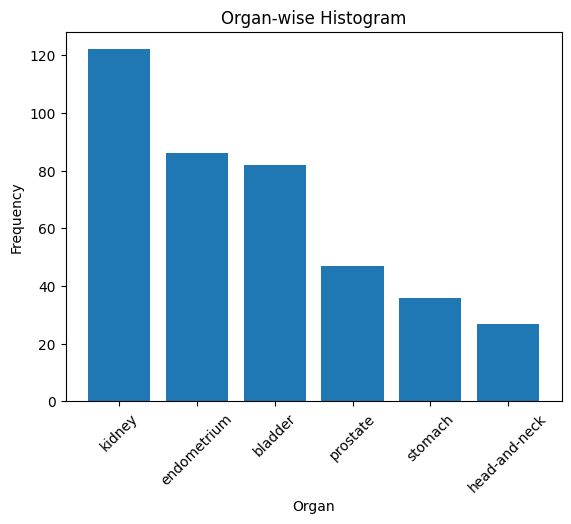

In [16]:
import matplotlib.pyplot as plt

# Group the data by organ and count the occurrences
organ_counts = df['organ'].value_counts()

# Plot the histogram
plt.bar(organ_counts.index, organ_counts.values)
plt.xlabel('Organ')
plt.ylabel('Frequency')
plt.title('Organ-wise Histogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


**Pls include some statstical tests.

##Image Vizz..



1.   Cell images:

Cell images provide detailed information about individual cells within the tissue samples.
They can be used to study cell morphology, cell classification, and cell-level features.
Analysis on cell images can involve tasks like cell segmentation, cell counting, cell classification, or studying cellular structures.

2.   Tissue images:

Tissue images provide a broader view of the tissue samples, capturing the spatial arrangement and context of cells within the tissue.
They can be used to study tissue-level characteristics, such as tissue composition, tumor regions, or overall tissue patterns.
Analysis on tissue images can involve tasks like tissue segmentation, tumor detection, tissue classification, or studying tissue-level features.

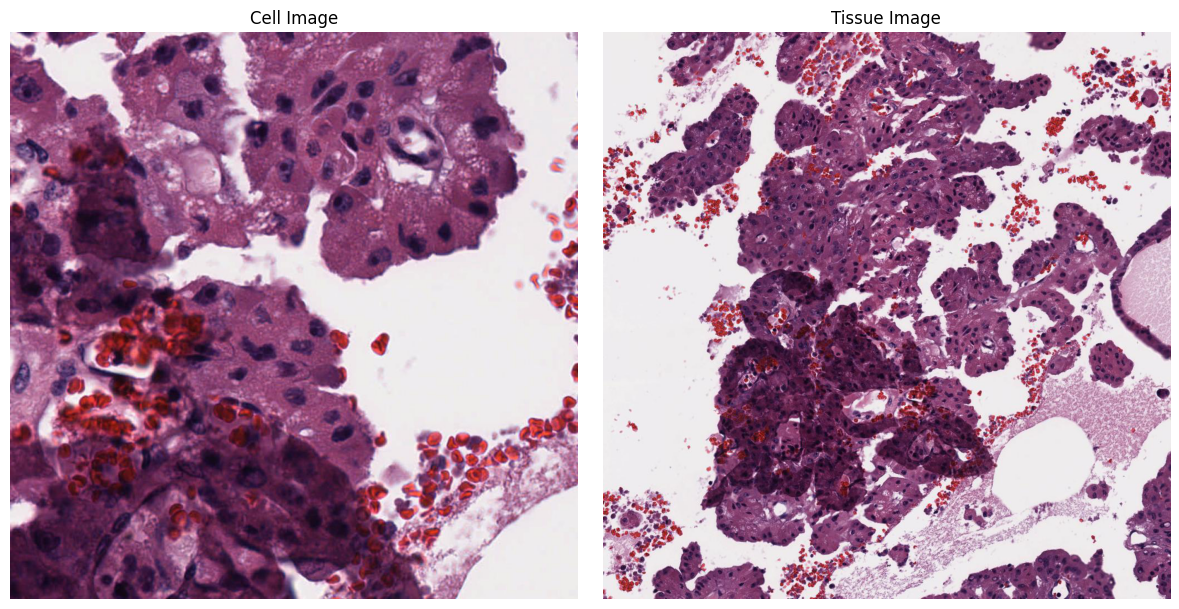

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the cell and tissue images
cell_image_path = '/content/drive/MyDrive/ocelot2023_v0.1.2/images/train/cell/001.jpg'
tissue_image_path = '/content/drive/MyDrive/ocelot2023_v0.1.2/images/train/tissue/001.jpg'

# Load the cell and tissue images
cell_image = mpimg.imread(cell_image_path)
tissue_image = mpimg.imread(tissue_image_path)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the cell image in the first subplot
axs[0].imshow(cell_image)
axs[0].set_title('Cell Image')
axs[0].axis('off')

# Display the tissue image in the second subplot
axs[1].imshow(tissue_image)
axs[1].set_title('Tissue Image')
axs[1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


##Base Model 
